**2. Data Understanding

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")

# Load the Heart Attack Prediction dataset
url = "https://raw.githubusercontent.com/sliu734/INFOSYS-722-Data-Mining-and-Big-Data/main/cardio_train.csv"
heart_df = pd.read_csv(url, sep=';')

# Data structure
print("Heart Attack Dataset Shape:", heart_df.shape)
print("Heart Attack Columns:", heart_df.columns.tolist())
display(heart_df.head())

Heart Attack Dataset Shape: (70000, 13)
Heart Attack Columns: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


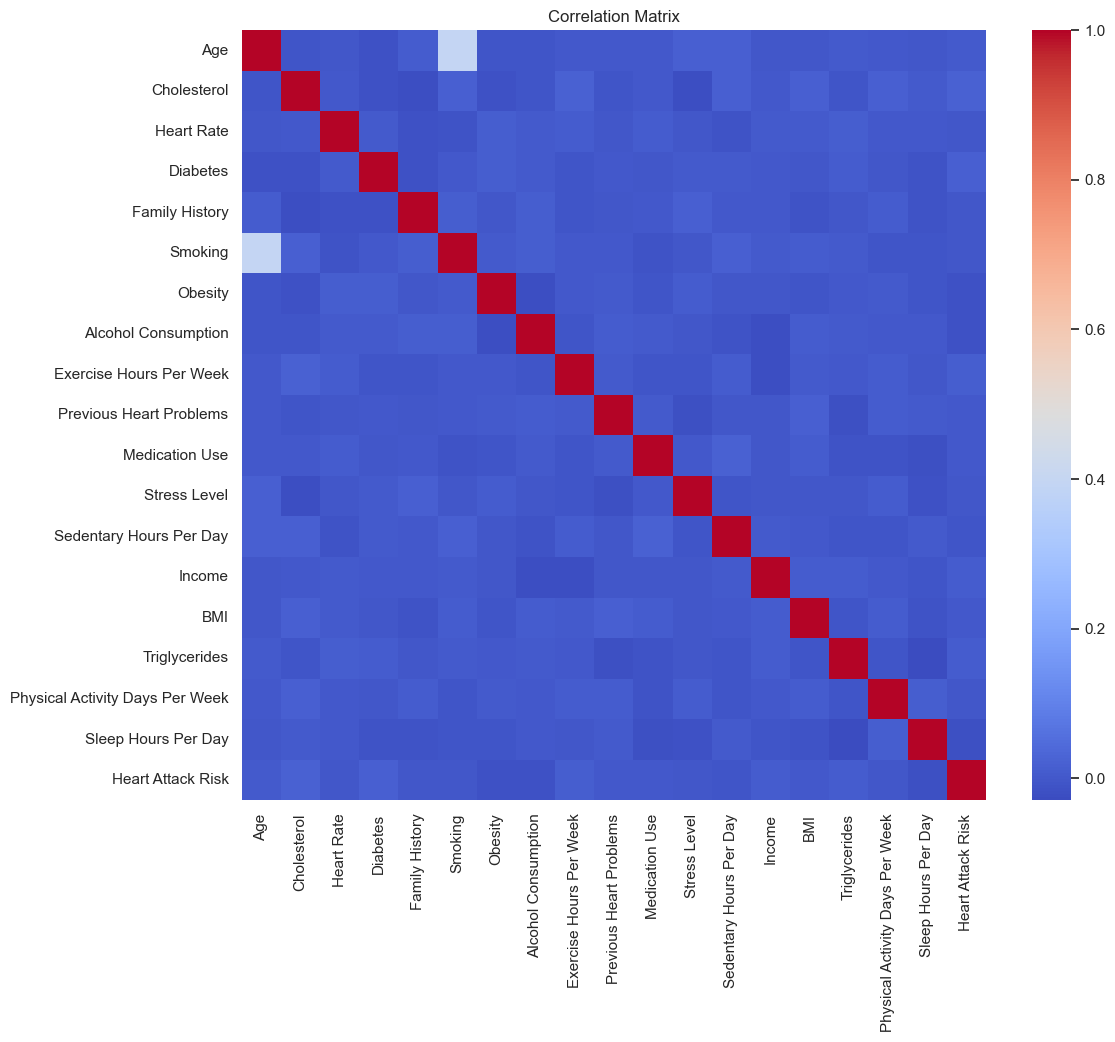

In [ ]:
# Select only numeric columns
numeric_df = heart_df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Load the Cardiovascular Disease dataset (semicolon-separated)
cardio_df = pd.read_csv("cardio_train.csv", sep=';')

# Data structure
print("Cardio Dataset Shape:", cardio_df.shape)
print("Heart Attack Columns:", heart_df.columns.tolist())
display(cardio_df.head())

Cardio Dataset Shape: (70000, 13)
Heart Attack Columns: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Summary statistics
display(cardio_df.describe())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check for missing values
display(cardio_df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

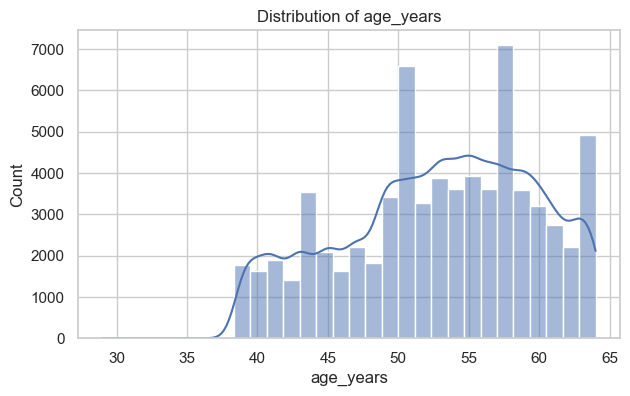

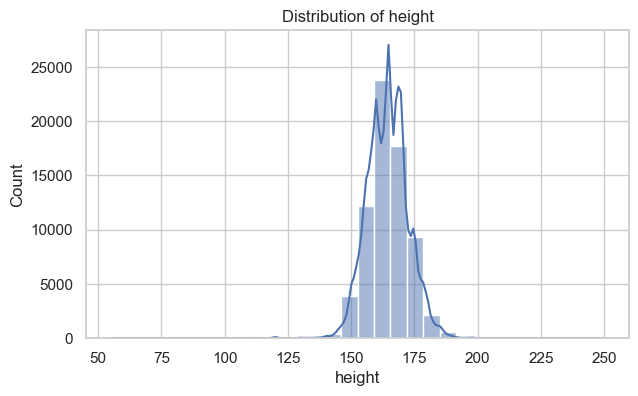

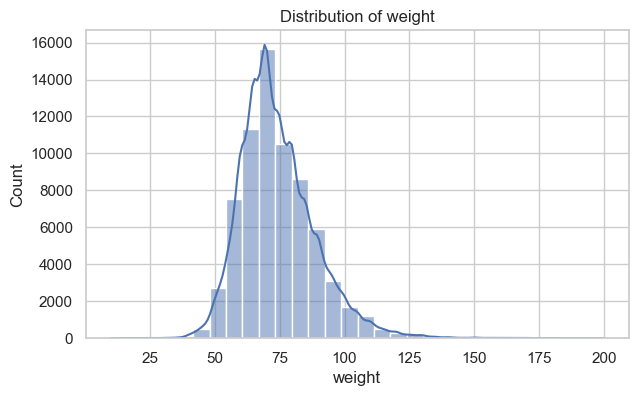

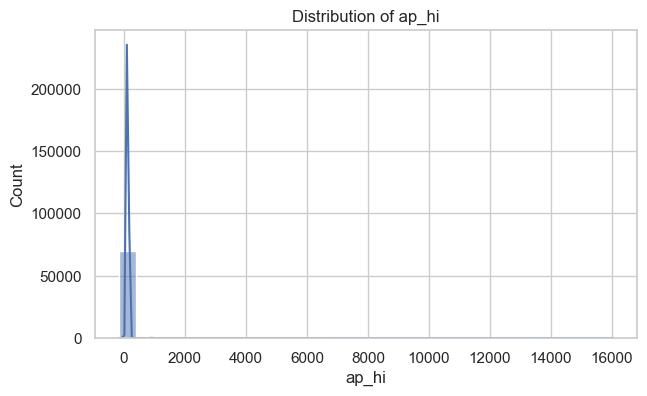

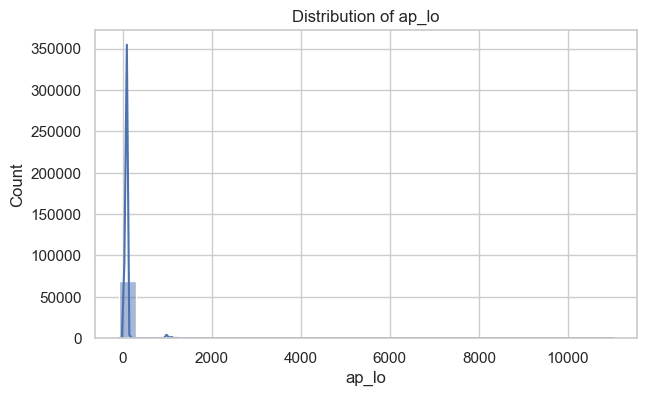

In [ ]:
# Convert age from days to years
cardio_df['age_years'] = cardio_df['age'] // 365

# Plot distribution of continuous variables
continuous_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']

for feature in continuous_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(cardio_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

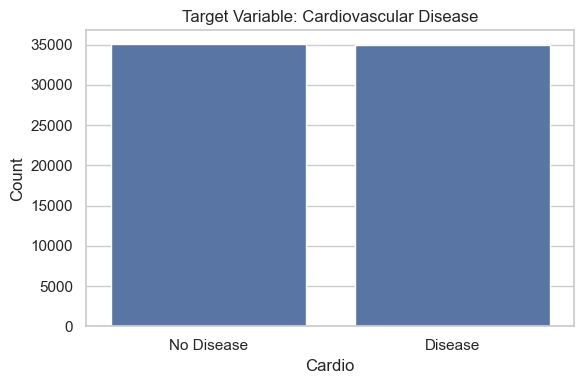

In [ ]:
# Target value distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='cardio', data=cardio_df)

plt.title("Target Variable: Cardiovascular Disease")
plt.xlabel("Cardio")
plt.ylabel("Count")

# Set fixed tick positions and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

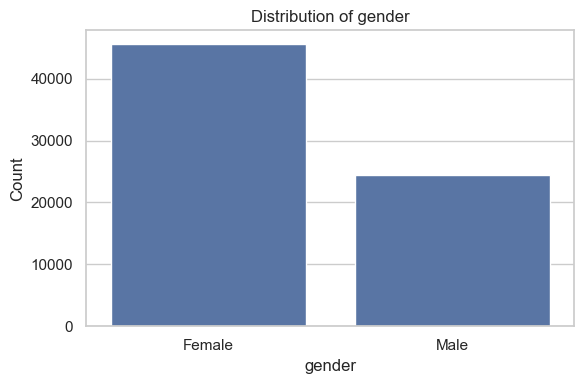

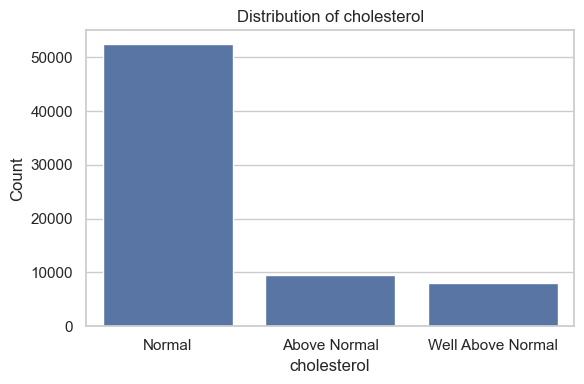

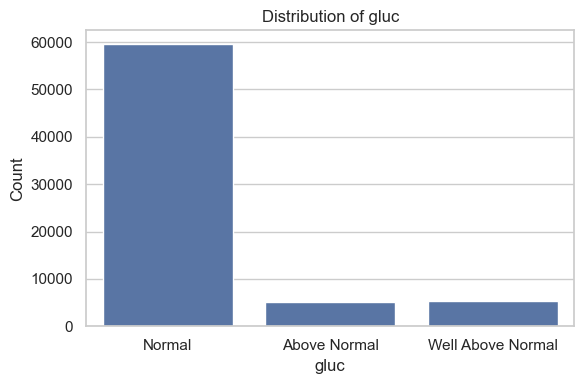

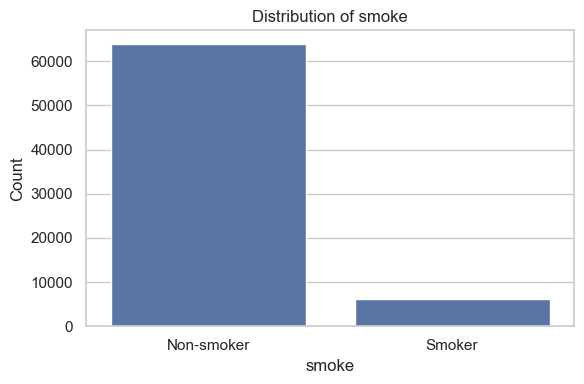

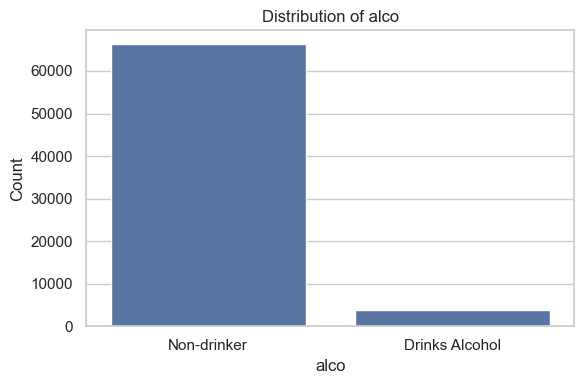

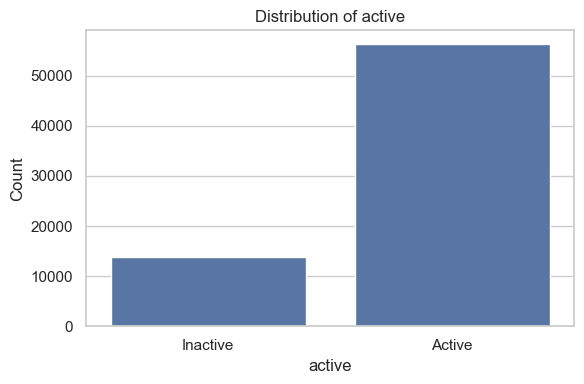

In [ ]:
# Mapping of categorical values to readable labels
label_maps = {
    'gender': {1: 'Female', 2: 'Male'},
    'cholesterol': {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'},
    'gluc': {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'},
    'smoke': {0: 'Non-smoker', 1: 'Smoker'},
    'alco': {0: 'Non-drinker', 1: 'Drinks Alcohol'},
    'active': {0: 'Inactive', 1: 'Active'},
    'cardio': {0: 'No Disease', 1: 'Disease'}
}

# Categorical Variable Distributions
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=feature, data=cardio_df)

    # Set title and axis
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Apply custom labels if mapping exists
    if feature in label_maps:
        mapping = label_maps[feature]
        unique_vals = sorted(cardio_df[feature].unique())
        new_labels = [mapping.get(val, val) for val in unique_vals]

        ax.set_xticks(range(len(unique_vals)))
        ax.set_xticklabels(new_labels)

    plt.tight_layout()
    plt.show()

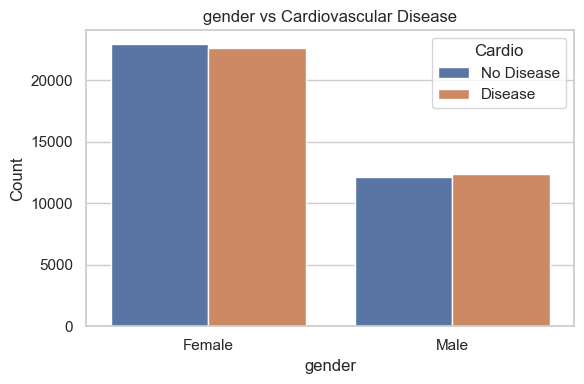

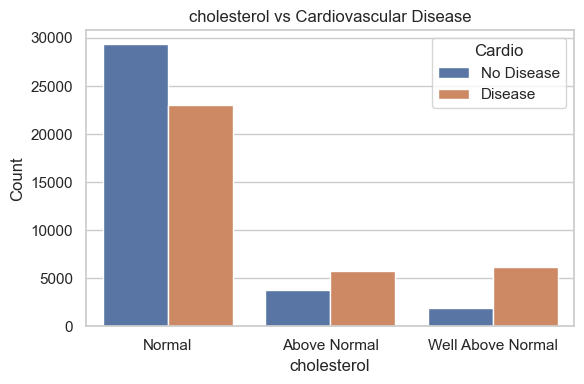

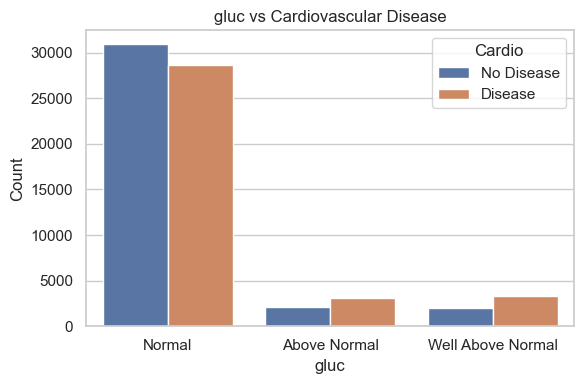

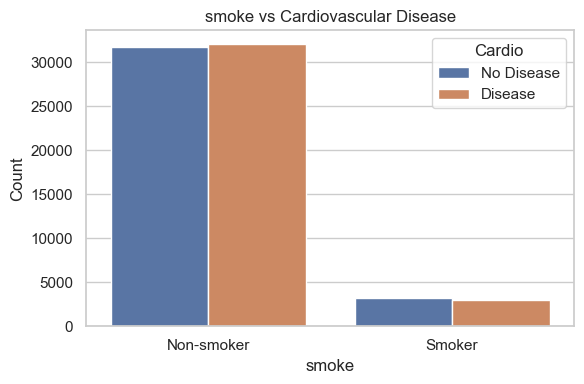

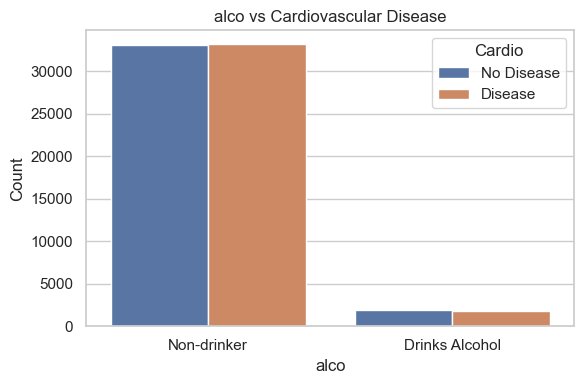

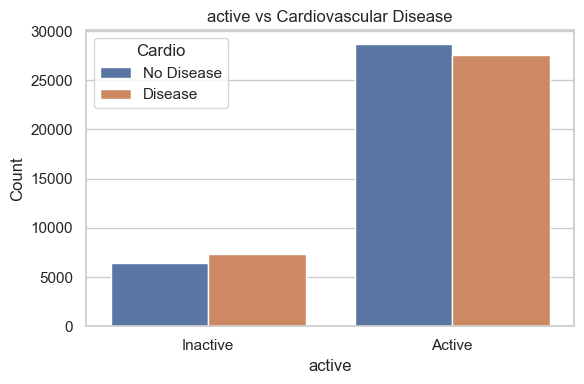

In [ ]:
# Categorical Variable Relationship to Target Variable
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=feature, hue='cardio', data=cardio_df)

    # Title and axis
    plt.title(f'{feature} vs Cardiovascular Disease')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # X-axis labels
    if feature in label_maps:
        mapping = label_maps[feature]
        unique_vals = sorted(cardio_df[feature].unique())
        new_labels = [mapping.get(val, val) for val in unique_vals]

        ax.set_xticks(range(len(unique_vals)))
        ax.set_xticklabels(new_labels)

    # Legend labels
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['No Disease', 'Disease'], title='Cardio')

    plt.tight_layout()
    plt.show()

**3. Data Preparation

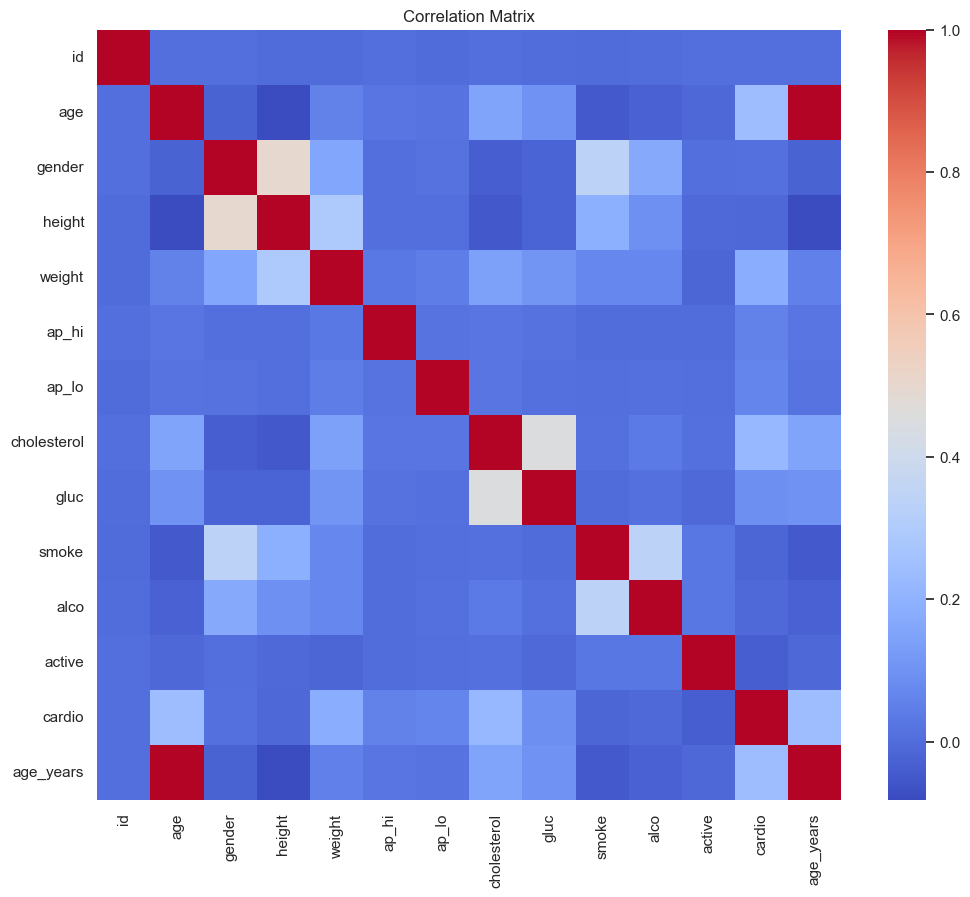

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cardio_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Drop ID
cardio_df = cardio_df.drop(columns=['id'])

# Keep only meaningful columns
selected_features = ['age_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                     'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cardio_df = cardio_df[selected_features]

In [ ]:
# Remove clearly invalid values first
cardio_df = cardio_df[
    (cardio_df['ap_hi'] >= 80) &
    (cardio_df['ap_hi'] <= 250) &
    (cardio_df['ap_lo'] >= 40) &
    (cardio_df['ap_lo'] <= 150)
]

# Swap systolic and diastolic when obviously reversed
swapped = (cardio_df['ap_hi'] < cardio_df['ap_lo'])
cardio_df.loc[swapped, ['ap_hi', 'ap_lo']] = cardio_df.loc[swapped, ['ap_lo', 'ap_hi']].values

# Remove cases where ap_hi still <= ap_lo (after attempted fix)
cardio_df = cardio_df[cardio_df['ap_hi'] > cardio_df['ap_lo']]

# Remove unrealistic height and weight
cardio_df = cardio_df[(cardio_df['height'] >= 130) & (cardio_df['height'] <= 220)]
cardio_df = cardio_df[(cardio_df['weight'] >= 30) & (cardio_df['weight'] <= 180)]

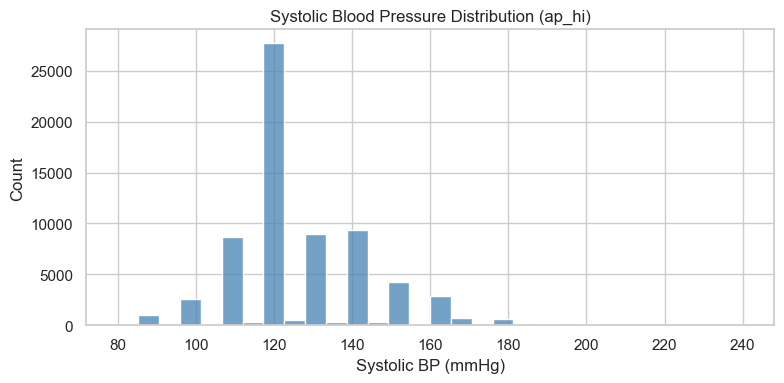

In [ ]:
# Systolic Blood Pressure (ap_hi)
plt.figure(figsize=(8, 4))
sns.histplot(cardio_df['ap_hi'], bins=30, color='steelblue')
plt.title('Systolic Blood Pressure Distribution (ap_hi)')
plt.xlabel('Systolic BP (mmHg)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

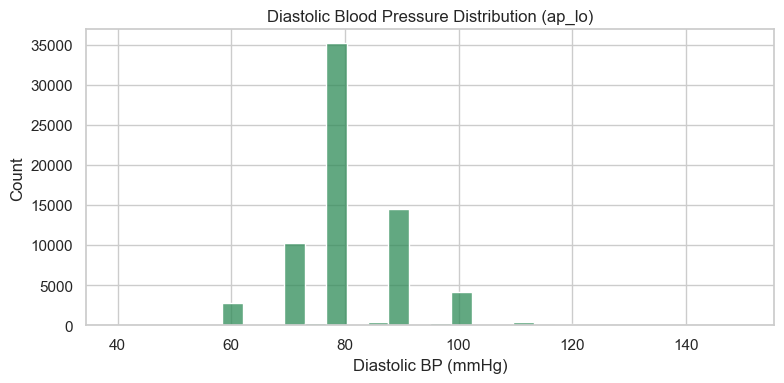

In [ ]:
# Diastolic Blood Pressure (ap_lo)
plt.figure(figsize=(8, 4))
sns.histplot(cardio_df['ap_lo'], bins=30, color='seagreen')
plt.title('Diastolic Blood Pressure Distribution (ap_lo)')
plt.xlabel('Diastolic BP (mmHg)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

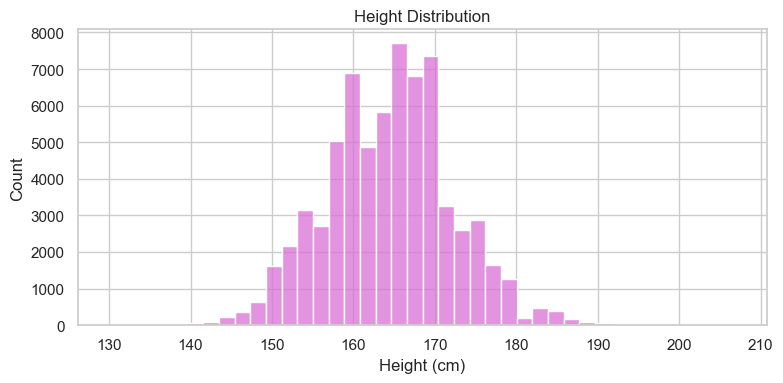

In [ ]:
# Height
plt.figure(figsize=(8, 4))
sns.histplot(cardio_df['height'], bins=40, color='orchid')
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

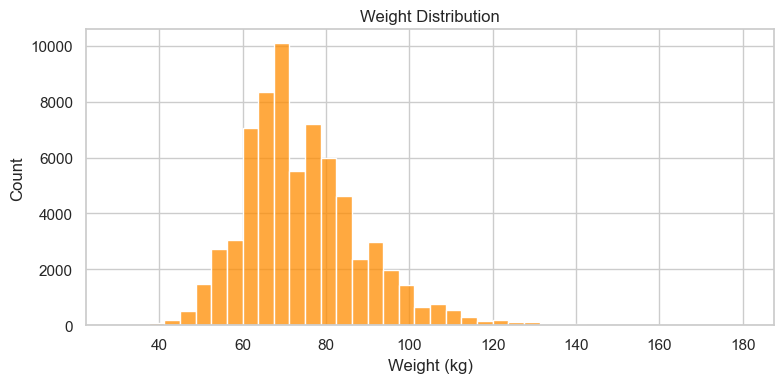

In [ ]:
# Weight
plt.figure(figsize=(8, 4))
sns.histplot(cardio_df['weight'], bins=40, color='darkorange')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

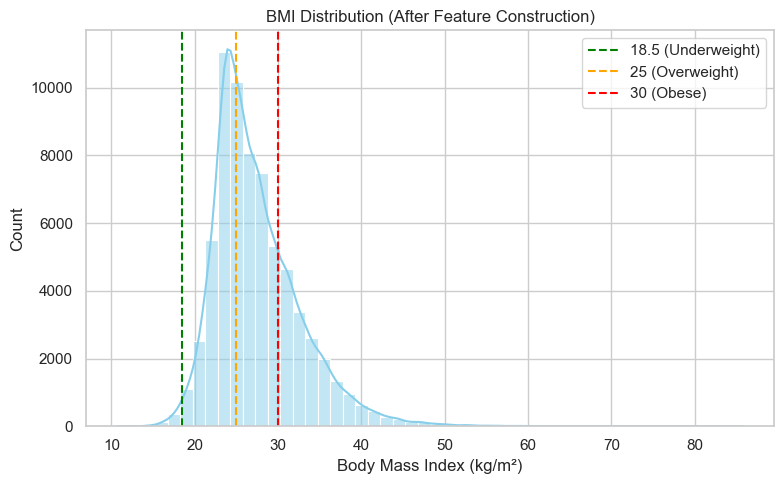

In [ ]:
# Body Mass Index (BMI)
cardio_df['BMI'] = cardio_df['weight'] / ((cardio_df['height'] / 100) ** 2)

# BMI distribution
plt.figure(figsize=(8, 5))
sns.histplot(cardio_df['BMI'], bins=50, kde=True, color='skyblue')
plt.title("BMI Distribution (After Feature Construction)")
plt.xlabel("Body Mass Index (kg/m²)")
plt.ylabel("Count")
plt.axvline(18.5, color='green', linestyle='--', label='18.5 (Underweight)')
plt.axvline(25, color='orange', linestyle='--', label='25 (Overweight)')
plt.axvline(30, color='red', linestyle='--', label='30 (Obese)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Re-create unique ID after cleaning
cardio_df = cardio_df.reset_index(drop=True)
cardio_df['id'] = cardio_df.index

# Simulate health region labels (4 standard NZ regions)
np.random.seed(42)
region_map_df = pd.DataFrame({
    'id': cardio_df['id'],
    'region': np.random.choice(["Northern", "Midland", "Central", "Southern"], size=len(cardio_df))
})

# Merge region info into main dataset
cardio_df = cardio_df.merge(region_map_df, on='id', how='left')

# Drop the helper 'id' column
cardio_df.drop(columns='id', inplace=True)
print(cardio_df['region'].value_counts())

region
Northern    17187
Southern    17183
Midland     17183
Central     17086
Name: count, dtype: int64


In [ ]:
display(cardio_df.head())

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,region
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Central
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Southern
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Northern
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Central
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Central


In [ ]:
# Convert all column names to lowercase for consistency
cardio_df.columns = cardio_df.columns.str.lower()

# Convert selected columns to categorical types for memory efficiency and modeling clarity
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'region']
for col in categorical_columns:
    cardio_df[col] = cardio_df[col].astype('category')

# Rename ambiguous column names to more interpretable ones
cardio_df.rename(columns={
    'ap_hi': 'systolic_bp',
    'ap_lo': 'diastolic_bp'
}, inplace=True)

# Round BMI to 1 decimal
cardio_df['bmi'] = cardio_df['bmi'].round(1)

# Convert selected columns from int to float types
int_columns = ['age_years', 'height', 'systolic_bp', 'diastolic_bp']
for col in int_columns:
    cardio_df[col] = cardio_df[col].astype(float)

# Reorder columns so that the target variable 'cardio' is the last column
columns_ordered = [col for col in cardio_df.columns if col != 'cardio'] + ['cardio']
cardio_df = cardio_df[columns_ordered]

# Check the updated DataFrame structure
display(cardio_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68639 entries, 0 to 68638
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age_years     68639 non-null  float64 
 1   gender        68639 non-null  category
 2   height        68639 non-null  float64 
 3   weight        68639 non-null  float64 
 4   systolic_bp   68639 non-null  float64 
 5   diastolic_bp  68639 non-null  float64 
 6   cholesterol   68639 non-null  category
 7   gluc          68639 non-null  category
 8   smoke         68639 non-null  category
 9   alco          68639 non-null  category
 10  active        68639 non-null  category
 11  bmi           68639 non-null  float64 
 12  region        68639 non-null  category
 13  cardio        68639 non-null  int64   
dtypes: category(7), float64(6), int64(1)
memory usage: 4.1 MB


None

In [ ]:
display(cardio_df.head())

,age_years,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,bmi,region,cardio
0,50.0,2,168.0,62.0,110.0,80.0,1,1,0,0,1,22.0,Central,0
1,55.0,1,156.0,85.0,140.0,90.0,3,1,0,0,1,34.9,Southern,1
2,51.0,1,165.0,64.0,130.0,70.0,3,1,0,0,0,23.5,Northern,1
3,48.0,2,169.0,82.0,150.0,100.0,1,1,0,0,1,28.7,Central,1
4,47.0,1,156.0,56.0,100.0,60.0,1,1,0,0,0,23.0,Central,0


**4. Data transformation

In [ ]:
# Remove completely duplicated rows (all columns identical)
cardio_df.drop_duplicates(inplace=True)

# Remove constant columns (if any exist)
nunique_counts = cardio_df.nunique()
constant_cols = nunique_counts[nunique_counts <= 1].index.tolist()
cardio_df.drop(columns=constant_cols, inplace=True)

# Drop rows with any missing values (currently not necessary, included for robustness)
cardio_df.dropna(inplace=True)

# Drop redundant features: height and weight (information already captured by BMI)
cardio_df.drop(columns=['height', 'weight'], inplace=True)

# Confirm final dataset shape and types
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67517 entries, 0 to 68638
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age_years     67517 non-null  float64 
 1   gender        67517 non-null  category
 2   systolic_bp   67517 non-null  float64 
 3   diastolic_bp  67517 non-null  float64 
 4   cholesterol   67517 non-null  category
 5   gluc          67517 non-null  category
 6   smoke         67517 non-null  category
 7   alco          67517 non-null  category
 8   active        67517 non-null  category
 9   bmi           67517 non-null  float64 
 10  region        67517 non-null  category
 11  cardio        67517 non-null  int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 3.5 MB


age_years skewness: -0.304
systolic_bp skewness: 0.913
diastolic_bp skewness: 0.312
bmi skewness: 1.195


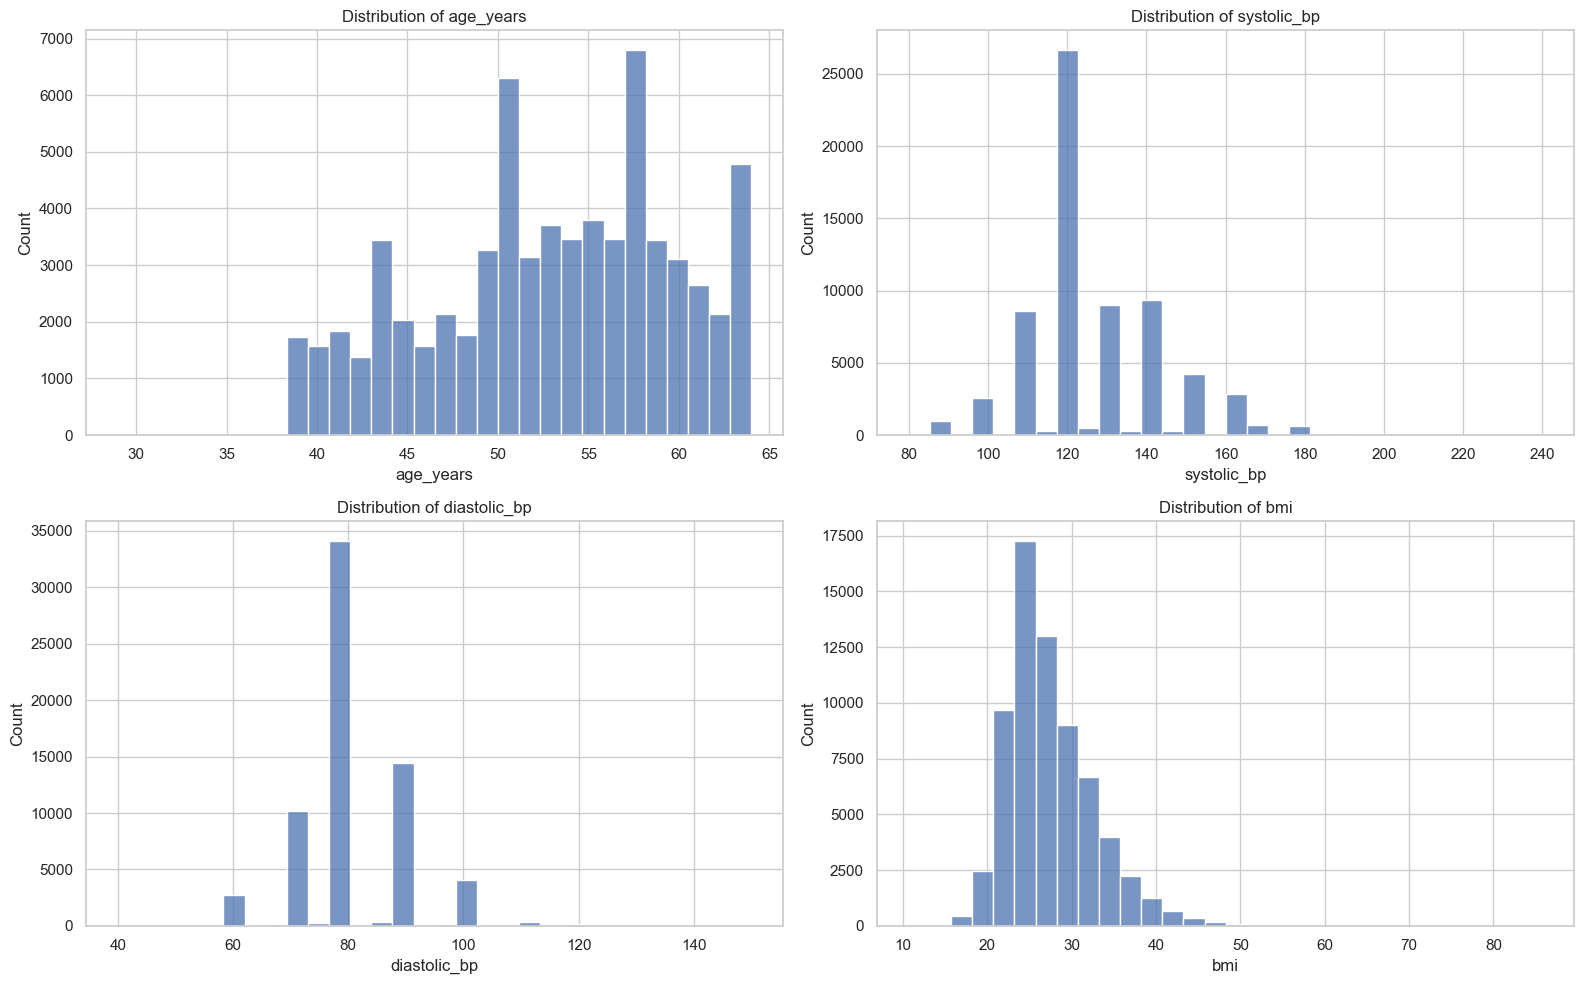

In [ ]:
from scipy.stats import skew
# list of all continuous variables
continuous_vars = ['age_years', 'systolic_bp', 'diastolic_bp', 'bmi']

# count skew
for var in continuous_vars:
    sk = skew(cardio_df[var])
    print(f"{var} skewness: {sk:.3f}")

# plot distribution
plt.figure(figsize=(16, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 2, i+1)
    sns.histplot(cardio_df[var], bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

Original BMI skewness: 1.195
Log-transformed BMI skewness: 0.529


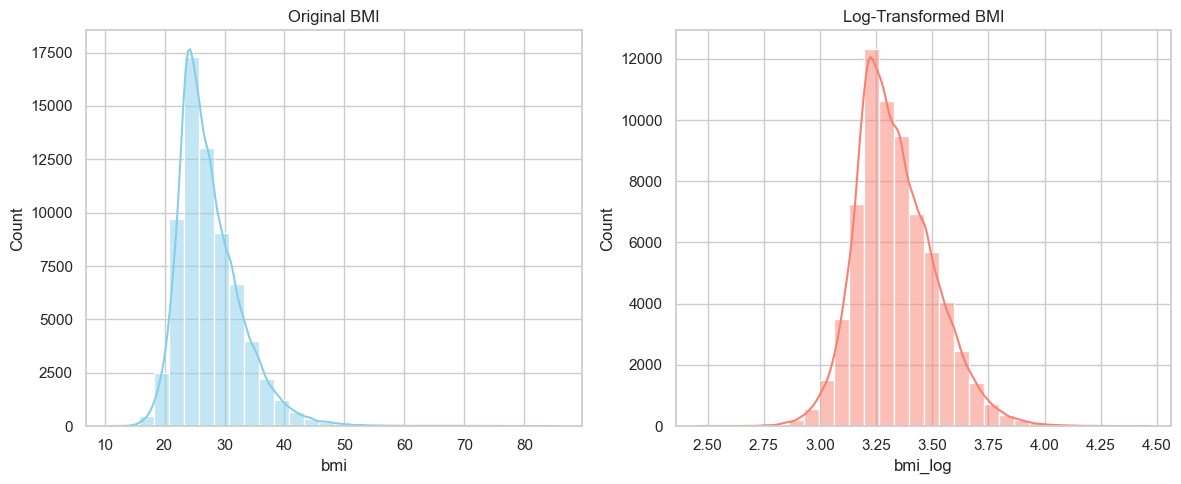

In [ ]:
# Apply log1p transform to BMI (new column bmi_log)
cardio_df["bmi_log"] = np.log1p(cardio_df["bmi"])

# Calculate new skewness
original_skew = skew(cardio_df["bmi"])
log_skew = skew(cardio_df["bmi_log"])
print(f"Original BMI skewness: {original_skew:.3f}")
print(f"Log-transformed BMI skewness: {log_skew:.3f}")

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cardio_df["bmi"], kde=True, bins=30, color='skyblue')
plt.title("Original BMI")

plt.subplot(1, 2, 2)
sns.histplot(cardio_df["bmi_log"], kde=True, bins=30, color='salmon')
plt.title("Log-Transformed BMI")

plt.tight_layout()
plt.show()

**6. Data-Mining Algorithm(s) Selection

In [ ]:
# Randomly sample 1000 rows from the full dataset for algorithm exploration
cardio_sample = cardio_df.sample(n=1000, random_state=42)

# Prepare features and target (exclude 'region' and 'cardio' columns)
X = cardio_sample.drop(columns=['cardio', 'region'])
y = cardio_sample['cardio']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Build a simple pipeline with standardization and logistic regression
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])
# Fit the model on the sampled data
lr_pipeline.fit(X, y)

# Predict on the same data (exploratory purpose only)
y_pred = lr_pipeline.predict(X)

# Print classification metrics
print("Logistic Regression")
print(classification_report(y, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     33792
           1       0.75      0.68      0.71     33725

    accuracy                           0.73     67517
   macro avg       0.73      0.73      0.73     67517
weighted avg       0.73      0.73      0.73     67517



In [ ]:
# Get the trained scaler and logistic regression model from the pipeline
scaler = lr_pipeline.named_steps["scaler"]
model = lr_pipeline.named_steps["clf"]

# Get feature names from the original DataFrame
feature_names = X.columns

# Get the learned coefficients from the model
coefficients = model.coef_[0]

# Create a DataFrame to display feature and coefficient
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# Display the result
print(coef_df)

         Feature  Coefficient
2    systolic_bp     0.933505
10       bmi_log     0.463153
0      age_years     0.337743
4    cholesterol     0.334100
3   diastolic_bp     0.109595
1         gender     0.007863
6          smoke    -0.040330
7           alco    -0.050546
5           gluc    -0.071286
8         active    -0.086937
9            bmi    -0.321429


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     33792
           1       0.76      0.68      0.72     33725

    accuracy                           0.73     67517
   macro avg       0.73      0.73      0.73     67517
weighted avg       0.73      0.73      0.73     67517



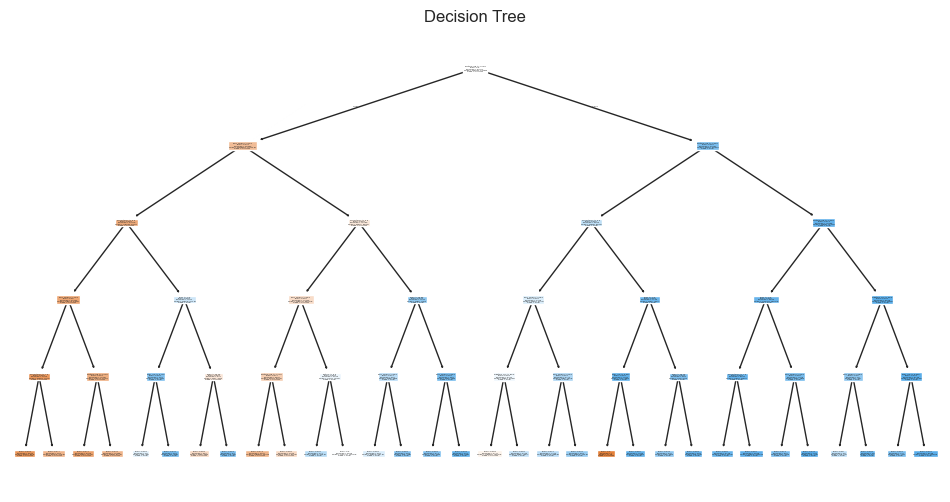

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a simple decision tree
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X, y)

# Predict on the same data (exploratory only)
y_pred_tree = tree.predict(X)

# Print classification report
print("Decision Tree Classifier")
print(classification_report(y, y_pred_tree))

# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, class_names=["No CVD", "CVD"], filled=True)
plt.title("Decision Tree")
plt.show()

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     33792
           1       0.77      0.68      0.72     33725

    accuracy                           0.74     67517
   macro avg       0.74      0.74      0.74     67517
weighted avg       0.74      0.74      0.74     67517



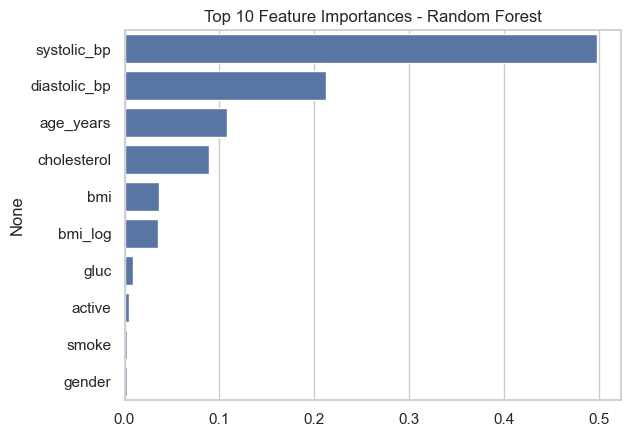

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X, y)

# Predict on the same data (exploratory only)
y_pred_rf = rf.predict(X)

# Print classification report
print("Random Forest Classifier")
print(classification_report(y, y_pred_rf))

# Visualize the feature importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

6.3 Model parameters selected

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "criterion": ["gini", "entropy"]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc"
)

grid_search.fit(X, y)

# Best model
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [ ]:
# Prepare features and target (exclude 'region' and 'cardio')
X = cardio_df.drop(columns=['cardio', 'region'])
y = cardio_df['cardio']

# Perform 80/20 split with fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print dataset sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Print class distribution in train and test sets
print("\nClass distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in Test Set:")
print(y_test.value_counts(normalize=True))

Training set size: (54013, 11)
Test set size: (13504, 11)

Class distribution in Training Set:
cardio
1    0.501065
0    0.498935
Name: proportion, dtype: float64

Class distribution in Test Set:
cardio
0    0.506739
1    0.493261
Name: proportion, dtype: float64


** 7. Data Mining

Accuracy: 0.7331161137440758
Recall: 0.7003452934994746
Precision: 0.743663318986131
F1-score: 0.7213545693520953
AUC: 0.7946250147785635

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      6843
           1       0.74      0.70      0.72      6661

    accuracy                           0.73     13504
   macro avg       0.73      0.73      0.73     13504
weighted avg       0.73      0.73      0.73     13504



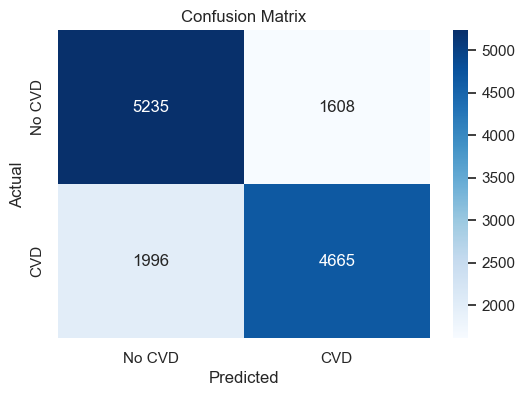

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train final Decision Tree with best parameters
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=10,
    min_samples_split=2,
    random_state=42
)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No CVD","CVD"], yticklabels=["No CVD","CVD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

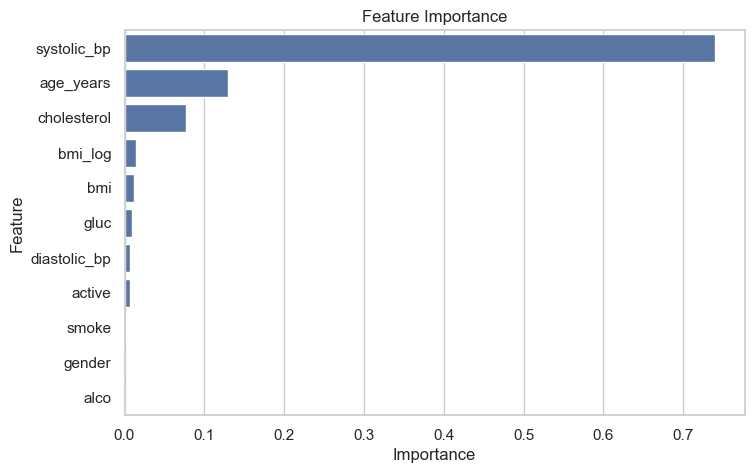

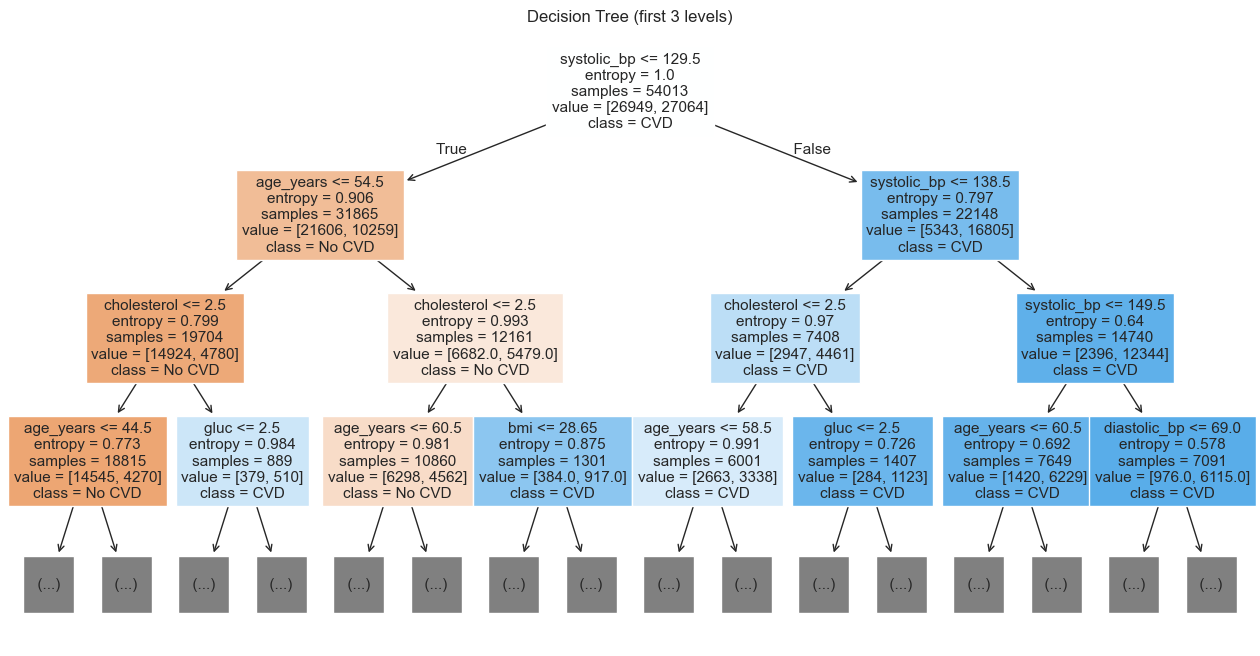

|--- systolic_bp <= 129.50
|   |--- age_years <= 54.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age_years <= 44.50
|   |   |   |   |--- cholesterol <= 1.50
|   |   |   |   |   |--- systolic_bp <= 114.50
|   |   |   |   |   |   |--- gluc <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- gluc >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- systolic_bp >  114.50
|   |   |   |   |   |   |--- age_years <= 40.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age_years >  40.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cholesterol >  1.50
|   |   |   |   |   |--- bmi_log <= 3.38
|   |   |   |   |   |   |--- bmi <= 27.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- bmi >  27.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- bmi_log >  3.38
|   |   |   |   |   |   |--- gender <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   

In [ ]:
# Feature importance
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=importances)
plt.title("Feature Importance")
plt.show()

# Decision tree visualization (optional if too big)
plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X.columns, class_names=["No CVD","CVD"], filled=True, max_depth=3, fontsize=11)
plt.title("Decision Tree (first 3 levels)")
plt.show()

# Export text-based tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


In [ ]:
import numpy as np

# Identify which leaf each test sample falls into
leaf_id_test = clf.apply(X_test)
leaf_df = pd.DataFrame({
    "leaf": leaf_id_test,
    "y_true": y_test.values,
    "y_pred": y_pred
})

# Aggregate at the leaf level: support (sample size) and positive rate (purity)
leaf_summary = (leaf_df
    .groupby("leaf")
    .agg(support=("y_true","size"),
         positives=("y_true","sum"),
         positive_rate=("y_true","mean"),
         predicted_label=("y_pred", lambda s: int(pd.Series(s).mode()[0])))
    .reset_index()
)

# high-risk top leaves
top_high_risk = (leaf_summary.query("predicted_label == 1")
                 .sort_values(["positive_rate","support"], ascending=[False, False])
                 .head(5))
print("Top High-Risk Leaves (pred=1):")
print(top_high_risk)
top_high_risk.to_csv("top_high_risk_leaves.csv", index=False)

# low-risk top leaves
top_low_risk = (leaf_summary.query("predicted_label == 0")
                .sort_values(["positive_rate","support"], ascending=[True, False])
                .head(5))
print("\nTop Low-Risk Leaves (pred=0):")
print(top_low_risk)
top_low_risk.to_csv("top_low_risk_leaves.csv", index=False)


Top High-Risk Leaves (pred=1):
    leaf  support  positives  positive_rate  predicted_label
79   165       12         12            1.0                1
57   120        4          4            1.0                1
75   158        4          4            1.0                1
78   163        3          3            1.0                1
85   177        3          3            1.0                1

Top Low-Risk Leaves (pred=0):
    leaf  support  positives  positive_rate  predicted_label
39    84        5          0       0.000000                0
5     15        4          0       0.000000                0
23    51        3          0       0.000000                0
38    83        1          0       0.000000                0
0      7      532         40       0.075188                0


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.sparse import csr_matrix

# trace several samples
idx_tp = np.where((y_test==1) & (y_pred==1))[0][:1]
idx_fp = np.where((y_test==0) & (y_pred==1))[0][:1]
idx_tn = np.where((y_test==0) & (y_pred==0))[0][:1]
idx_fn = np.where((y_test==1) & (y_pred==0))[0][:1]

def print_path_for_index(i):
    row = X_test.iloc[[i]]
    node_indicator = clf.decision_path(row)
    leaf_id = clf.apply(row)[0]
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    rules = []
    for node_id in node_indicator.indices:
        if feature[node_id] == -2:  # leaf
            continue
        fname = X.columns[feature[node_id]]
        sign = "<=" if row.iloc[0, feature[node_id]] <= threshold[node_id] else ">"
        rules.append(f"{fname} {sign} {threshold[node_id]:.2f} "
                     f"(value={row.iloc[0, feature[node_id]]:.2f})")
    print(f"\nSample index {i} | True={y_test.iloc[i]} Pred={y_pred[i]} | Leaf={leaf_id}")
    for r in rules:
        print(" -", r)

# print example: one for each typr
for i in list(idx_tp) + list(idx_fp) + list(idx_tn) + list(idx_fn):
    print_path_for_index(i)



Sample index 0 | True=1 Pred=1 | Leaf=194
 - systolic_bp > 129.50 (value=140.00)
 - systolic_bp > 138.50 (value=140.00)
 - systolic_bp <= 149.50 (value=140.00)
 - age_years <= 60.50 (value=60.00)
 - age_years > 48.50 (value=60.00)
 - gluc <= 1.50 (value=1.00)
 - cholesterol <= 1.50 (value=1.00)

Sample index 1 | True=0 Pred=1 | Leaf=194
 - systolic_bp > 129.50 (value=140.00)
 - systolic_bp > 138.50 (value=140.00)
 - systolic_bp <= 149.50 (value=140.00)
 - age_years <= 60.50 (value=59.00)
 - age_years > 48.50 (value=59.00)
 - gluc <= 1.50 (value=1.00)
 - cholesterol <= 1.50 (value=1.00)

Sample index 2 | True=0 Pred=0 | Leaf=25
 - systolic_bp <= 129.50 (value=110.00)
 - age_years <= 54.50 (value=47.00)
 - cholesterol <= 2.50 (value=1.00)
 - age_years > 44.50 (value=47.00)
 - systolic_bp <= 119.50 (value=110.00)
 - bmi_log > 3.12 (value=3.17)
 - cholesterol <= 1.50 (value=1.00)

Sample index 9 | True=1 Pred=0 | Leaf=29
 - systolic_bp <= 129.50 (value=120.00)
 - age_years <= 54.50 (value

8.2 Visualising the Data, Results, Models and Patterns

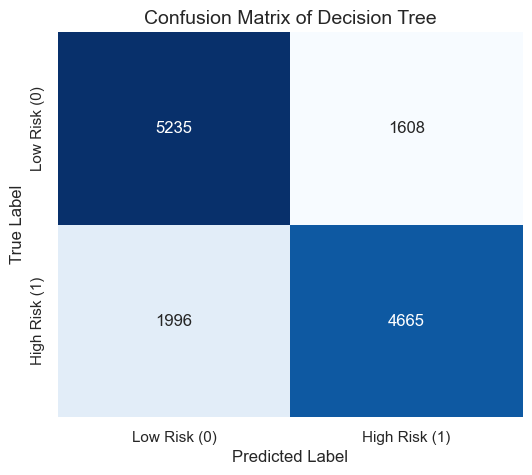

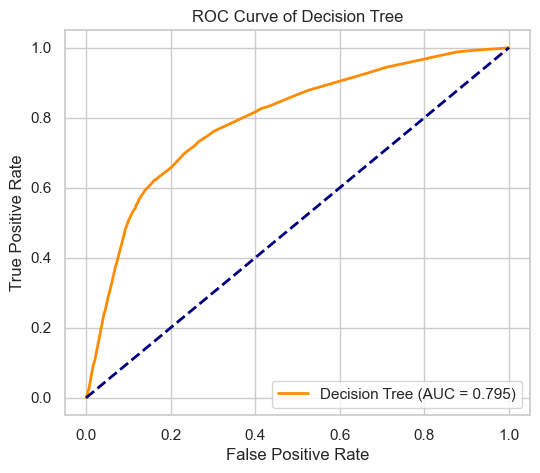

/var/folders/2c/z6zpy9290_1bdb2fthmzvpzm0000gn/T/ipykernel_52284/1007890572.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


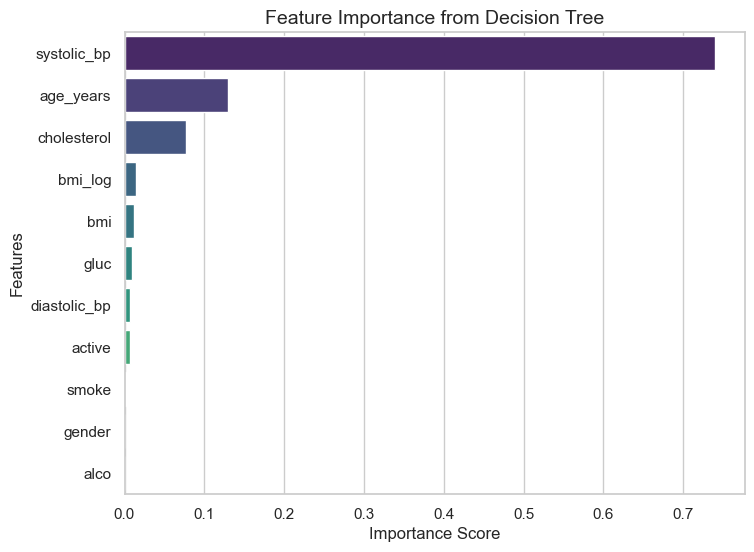

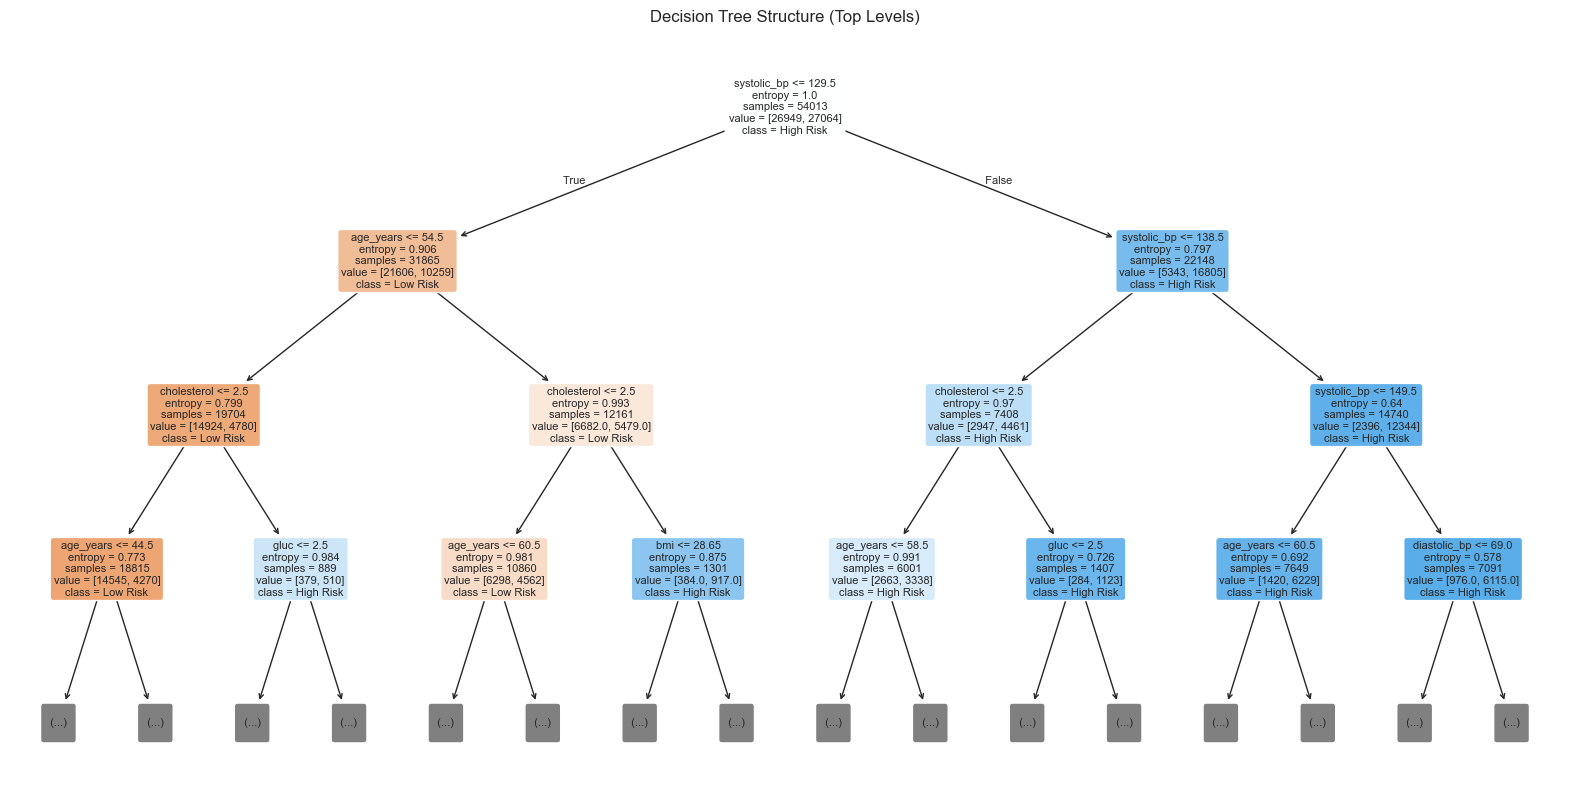

In [ ]:
# 1. Confusion Matrix Visualization
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Low Risk (0)", "High Risk (1)"],
            yticklabels=["Low Risk (0)", "High Risk (1)"])
plt.title("Confusion Matrix of Decision Tree", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# 2. ROC Curve
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"Decision Tree (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Decision Tree")
plt.legend(loc="lower right")
plt.show()


# 3. Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance from Decision Tree", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# 4. Visualize a part of the Decision Tree (structure)
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_train.columns, class_names=["Low Risk","High Risk"],
          filled=True, rounded=True, fontsize=8, max_depth=3)  # show only top 3 levels
plt.title("Decision Tree Structure (Top Levels)")
plt.show()


 8.5 Multiple Iterations: Model Comparisons

In [ ]:

# ---------------------------
# 1. Prepare Data
# ---------------------------
X = cardio_df.drop(columns=['cardio', 'region'])  # Features
y = cardio_df['cardio']                           # Target

# Train-test split (fixed seed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 2. Define Models for Iteration
# ---------------------------
models = {
    "Decision Tree (depth=5)": DecisionTreeClassifier(
        criterion="entropy", max_depth=5, min_samples_leaf=10, random_state=42
    ),
    "Decision Tree (depth=7)": DecisionTreeClassifier(
        criterion="entropy", max_depth=7, min_samples_leaf=10, random_state=42
    ),
    "Decision Tree (depth=9)": DecisionTreeClassifier(
        criterion="entropy", max_depth=9, min_samples_leaf=10, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=8, random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=1000, solver="lbfgs"
    )
}

# ---------------------------
# 3. Train, Predict, Evaluate
# ---------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Recall": round(rec, 3),
        "AUC": round(auc, 3) if auc else "N/A"
    })

# ---------------------------
# 4. Display Results
# ---------------------------
results_df = pd.DataFrame(results)
print(results_df)

                     Model  Accuracy  Recall    AUC
0  Decision Tree (depth=5)     0.735   0.677  0.792
1  Decision Tree (depth=7)     0.733   0.700  0.795
2  Decision Tree (depth=9)     0.735   0.716  0.795
3            Random Forest     0.733   0.664  0.801
4      Logistic Regression     0.731   0.678  0.792


In [ ]:
# Train full tree on a smaller sample
X_sample = X_train.sample(10000, random_state=42)
y_sample = y_train.loc[X_sample.index]

clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_sample, y_sample)

# Get pruning alphas
path = clf_full.cost_complexity_pruning_path(X_sample, y_sample)
ccp_alphas = path.ccp_alphas

# Keep only non-negative alphas
ccp_alphas = ccp_alphas[ccp_alphas >= 0]

# Try only 20 evenly spaced alphas
import numpy as np
alphas_to_try = np.linspace(ccp_alphas.min(), ccp_alphas.max(), 20)

results = []
for alpha in alphas_to_try:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=float(alpha))
    clf.fit(X_sample, y_sample)
    acc = clf.score(X_test, y_test)
    results.append((alpha, acc))

# Show results
import pandas as pd
results_df = pd.DataFrame(results, columns=["ccp_alpha", "Test Accuracy"])
display(results_df)


,ccp_alpha,Test Accuracy
0,0.000000,0.630110
1,0.004777,0.715862
2,0.009555,0.712826
3,0.014332,0.712826
4,0.019110,0.712826
5,0.023887,0.712826
6,0.028665,0.712826
7,0.033442,0.712826
8,0.038219,0.712826
9,0.042997,0.712826
